# Installing Cantera
For this notebook you will need [Cantera](http://www.cantera.org/), an open source suite of object-oriented software tools for problems involving chemical kinetics, thermodynamics, and/or transport processes.
Fortunately a helpful chap named Bryan Weber has made Anaconda packages, so to install you can simply type 
```
conda install -c bryanwweber cantera
```
at your terminal (if you can remember back to when you installed Anaconda!).
If you are on Windows you will probably also need to install the Visual C++ Redistributable which you can get [from Microsoft here](https://www.microsoft.com/en-us/download/details.aspx?id=48145).
There are other, more difficult, ways to install it in [the instructions](http://www.cantera.org/docs/sphinx/html/install.html) if you can't get the Anaconda packages to work. It is also already on the COE computer lab 274 Snell (though there you will have to `pip install jupyter` to get this notebook working).

In [1]:
# First, import cantera, with the nickname `ct` to save us some typing later.
import cantera as ct

# Then the usual suspects:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Heptane combustion

Download the reduced n-heptane model from LLNL https://combustion.llnl.gov/archived-mechanisms/alkanes/heptane-reduced-mechanism. Save the files alongside this python notebook. These files are in "CHEMKIN" format. First, we have to convert them into a format that is usable by Cantera. 
This may take a while and issue some warnings, but then end by saying `Validating mechanism...PASSED`:

In [2]:
from cantera import ck2cti
ck2cti.main(['--input=heptanesymp159_mec.txt',
             '--thermo=heptanesymp_therm.txt',
             '--permissive',
             '--output=heptanesymp159.cti'])


INFO:root:Skipping unexpected species "ar" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c2h5oh" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "sc2h4oh" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ic4h7" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ic4h8" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c4h8-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "tc4h9" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ic4h9" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ic4h10" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c4h10" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h10-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ic5h12" while reading thermodynamics entry.
INFO:root:S

Wrote CTI mechanism file to 'heptanesymp159.cti'.
Mechanism contains 160 species and 1540 reactions.
Validating mechanism...

**** WARNING ****
For species c7h15o-1, discontinuity in cp/R detected at Tmid = 1391
	Value computed using low-temperature polynomial:  53.0168.
	Value computed using high-temperature polynomial: 52.748.
PASSED.


Clearly, with 160 species and 1540 reactions, this mechanism is more detailed than any we have considered before!
Now, let's create a 'Solution' phase in Cantera called `gas` from the Cantera mechanism file we just created.

In [3]:
gas = ct.Solution('heptanesymp159.cti')



**** WARNING ****
For species c7h15o-1, discontinuity in cp/R detected at Tmid = 1391
	Value computed using low-temperature polynomial:  53.0168.
	Value computed using high-temperature polynomial: 52.748.


Let's examine some of the reactions and species in the mechanism.

This will return the first 10 reactions:

In [4]:
gas.reaction_equations(np.arange(10))

['ch3 + h (+M) => ch4 (+M)',
 'ch4 (+M) => ch3 + h (+M)',
 'ch4 + h => ch3 + h2',
 'ch3 + h2 => ch4 + h',
 'ch4 + oh => ch3 + h2o',
 'ch3 + h2o => ch4 + oh',
 'ch4 + o => ch3 + oh',
 'ch3 + oh => ch4 + o',
 'c2h6 + ch3 => c2h5 + ch4',
 'c2h5 + ch4 => c2h6 + ch3']

And this will return a list of the chemical species names, joined by spaces:

In [6]:
print(" ".join(gas.species_names))

n2 ch3 h ch4 h2 oh h2o o c2h6 c2h5 hco co co2 o2 h2o2 ho2 c2h4 ch3oh ch2oh ch3o ch2o c2h2 c2h3 c2h hcco ch2 ch ch2co ch2(s) pc2h4oh ch3co ch3cho c3h5-s c3h4-p c3h5-a c3h6 c3h4-a ch3chco c3h5-t c4h6 nc3h7 ic3h7 c3h8 c5h9 c4h7 c4h8-1 sc4h9 pc4h9 ch3coch3 ch3coch2 c2h5co c2h5cho c5h10-1 ch2cho c5h11-1 c5h11-2 c2h5o c2h5o2 ch3o2 ch3o2h c3h2 o2c2h4oh c2h4o2h c2h3co c2h3cho c3h5o c3h6o1-2 c3h6ooh1-2 c3h6ooh2-1 nc3h7o ic3h7o nc3h7o2 ic3h7o2 c4h7o c4h8ooh1-3o2 c4h8ooh1-3 nc4ket13 c4h8ooh1-2 c4h8o1-3 pc4h9o2 c3h3 hocho c2h3o1,2 nc3h7cho nc3h7co c3h6cho-2 ch2ch2coch3 c2h5coch2 c2h5coc2h4p nc3h7coch2 nc4h9cho nc4h9co hoch2o c6h13-1 c6h12-1 c6h11 nc7h16 c7h15-1 c7h15-2 c7h15-3 c7h15-4 c7h15o2-1 c7h15o2h-1 c7h15o2-2 c7h15o2h-2 c7h15o2-3 c7h15o2h-3 c7h14-1 c7h14-2 c7h14-3 c7h13 c7h15o2-4 c7h15o-1 c7h15o-2 c7h15o-3 c7h14ooh1-2 c7h14ooh1-3 c7h14ooh1-4 c7h14ooh2-3 c7h14ooh2-4 c7h14ooh2-5 c7h14ooh3-1 c7h14ooh3-2 c7h14ooh3-4 c7h14ooh3-5 c7h14ooh3-6 c7h14ooh4-2 c7h14ooh4-3 c7h14o1-3 c7h14o1-4 c7h14o2-4 c7

Knowing what all those species names mean is a [formidable challenge](http://www.northeastern.edu/comocheng/2014/04/nsf-grant-to-identify-discrepancies/) but we are [making headway](http://www.northeastern.edu/comocheng/2015/05/uscombustionmeeting/) (and more help is welcome).

For now, lets loop through all the species looking for ones with 7 carbons and 16 hydrogen atoms, which should be all the isomers of heptane.

In [7]:
for species in gas.species():
    if species.composition == {'C':7, 'H':16}:
        print(species.name)

nc7h16


There is only one!
Based on the name beginning with 'n' let's assume it represents normal-heptane (all 7 carbons in a single chain with no branching), which is the fuel that we want to simulate. Now we need to find the index number for this species.

In [8]:
i_heptane = gas.species_names.index('nc7h16')
# alternatively, this shortcut:
i_heptane = gas.species_index('nc7h16')
print("heptane is species index {0}".format(i_heptane))


heptane is species index 96


To specify the state of a system we must supply two intensive variables (temperature, pressure, density, specific entropy, specific enthalpy, specific volume) and the composition (mass or mole fractions). We will set the temperature, pressure, and mole fractions. In cantera, mole fractions are `X` and mass fractions are `Y`. We can then print some properties of our gas system by typing  `gas()`.

In [9]:
gas.TPX = 1000, 10e5, 'nc7h16:1.0'
gas()

 
  gas:
 
       temperature            1000  K
          pressure           1e+06  Pa
           density         12.0518  kg/m^3
  mean mol. weight         100.204  amu
 
                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      1.6164e+05         1.62e+07     J
   internal energy           78666        7.883e+06     J
           entropy          7336.4        7.351e+05     J/K
    Gibbs function     -7.1747e+06       -7.189e+08     J
 heat capacity c_p          3808.8        3.817e+05     J/K
 heat capacity c_v          3725.9        3.733e+05     J/K
 
                           X                 Y          Chem. Pot. / RT    
                     -------------     ------------     ------------
            nc7h16              1                1          -86.468
     [ +159 minor]              0                0



To find equilbrium you must specify which two intensive variables to hold constant. We'll find the equilbrium at constant Temperature and Pressure, then print the properties again.

In [10]:
gas.equilibrate('TP')
gas()

 
  gas:
 
       temperature            1000  K
          pressure           1e+06  Pa
           density         3.56862  kg/m^3
  mean mol. weight         29.6711  amu
 
                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      2.0726e+06         6.15e+07     J
   internal energy      1.7923e+06        5.318e+07     J
           entropy           10507        3.117e+05     J/K
    Gibbs function      -8.434e+06       -2.502e+08     J
 heat capacity c_p          3583.5        1.063e+05     J/K
 heat capacity c_v          3303.3        9.801e+04     J/K
 
                           X                 Y          Chem. Pot. / RT    
                     -------------     ------------     ------------
               ch3    1.21276e-07      6.14521e-08         -22.1802
                 h    3.16881e-11      1.07646e-12         -10.7233
               ch4       0.361997         0.195727         -32.9035
                h2  

You will recall from Thermodynamics II that a system going to equilibrium at constant T and P should minimize the specific Gibbs free energy of the system. Sure enough, it has gone down (compare the "Gibbs function" in the "1 kg" columns above.  To check that number represents what we expect (this will be returned in Cantera's default SI units, a combination of K, m<sup>3</sup>, Pa, J, kg, kmol; in this case J/kg)

In [11]:
print(gas.h - gas.T * gas.s)
print(gas.g)

-8434027.951513084
-8434027.951513084


Now lets find the equilibrium composition at 1 bar pressure and a range of temperatures between 100 and 2000 K

In [12]:
temperatures = np.arange(100,2000,20)
# make a big array to store the results in
equilibrium_mass_fractions = np.zeros((len(temperatures), gas.n_species))
for i, T in enumerate(temperatures):
    gas.TP = T, 1e5
    gas.equilibrate('TP')
    print(T,end=" ")
    equilibrium_mass_fractions[i,:] = gas.Y

100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 1000 1020 1040 1060 1080 1100 1120 1140 1160 1180 1200 1220 1240 1260 1280 1300 1320 1340 1360 1380 1400 1420 1440 1460 1480 1500 1520 1540 1560 1580 1600 1620 1640 1660 1680 1700 1720 1740 1760 1780 1800 1820 1840 1860 1880 1900 1920 1940 1960 1980 

Now plot the equilibrium mass fractions as a function of temperature. With 160 lines, let's forgo the legend and instead label the biggest peaks directly.

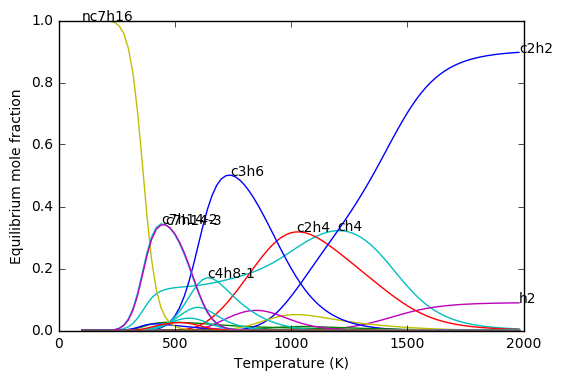

In [13]:
plt.plot(temperatures,equilibrium_mass_fractions)
plt.xlabel("Temperature (K)")
plt.ylabel("Equilibrium mole fraction")
for i, name in enumerate(gas.species_names):
    Y = equilibrium_mass_fractions[:,i]
    if max(Y)> 0.08:
        peakT = temperatures[Y.argmax()]
        peakY = max(Y)
        plt.text(peakT,peakY, name)
plt.show()


## Question (a) 
What do you notice about the species that peaks at 100K, and the ones that peak at 2000K? Can you explain or justify this?

To see some of the complexity hidden at low concentrations, let's plot the y axis on a logarithmic scale:

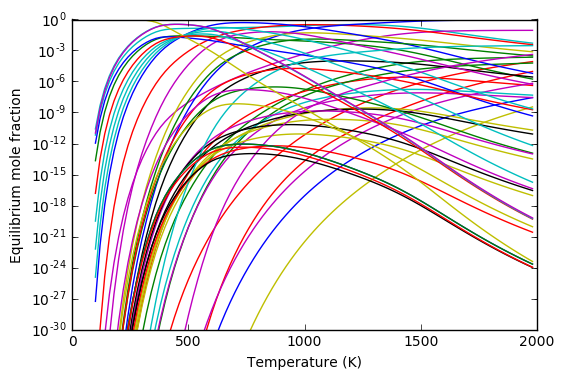

In [14]:
plt.semilogy(temperatures,equilibrium_mass_fractions)
plt.ylim(1e-30,1)
plt.xlabel("Temperature (K)")
plt.ylabel("Equilibrium mole fraction")
plt.show()

If you think about how many reactions are equilibrated, it was remarkably quick!

Now we'll add some air, which is mostly nitrogen and oxygen. First of all, find the names of anything with just 2 oxygen atoms or just 2 nitrogen atoms.

In [15]:
for species in gas.species():
    if species.composition == {'O':2} or species.composition == {'N':2}:
        print(species.name)

n2
o2


Now look up and store the species indices

In [16]:
i_oxygen = gas.species_names.index('o2')
print("oxygen is species index {0}".format(i_oxygen))
i_nitrogen = gas.species_names.index('n2')
print("nitrogen is species index {0}".format(i_nitrogen))

oxygen is species index 13
nitrogen is species index 0


## Question (b)

For a "stoichiometric" mixture of n-heptane and air (enough oxygen to reach complete combustion) how many moles of heptane and how many moles of nitrogen should you have for one mole of oxygen?  Assume air is 80% nitrogen and 20% oxygen.

In [17]:
oxygen_mole = 1. # moles oxygen
## ANSWER:
nitrogen_mole = 4 * oxygen_mole  
heptane_mole = oxygen_mole / 11.

In [18]:
## Some checks
assert nitrogen_mole / oxygen_mole == 4, "Assume air is 80% nitrogen and 20% oxygen"
assert oxygen_mole / heptane_mole == 3+1+3//5*3+8-5//3, "C7H16 + ?? O2 => 8 H2O + 7 CO2"

Now use those to make a string for the '`X`' when we set `gas.TPX`. Although we call it a mole fraction, they don't need to add up to one: Cantera will normalize it, preserving the ratios.  Then print it, use it, and check it.

In [19]:
X_string = 'nc7h16:{0},o2:{1},n2:{2}'.format(heptane_mole, oxygen_mole, nitrogen_mole)
print("The 'X' will be set to {0!r}".format(X_string))
gas.TPX = 1000, 10e5, X_string
gas()
assert round(gas.concentrations[i_oxygen] / gas.concentrations[i_heptane], 2) == 11

The 'X' will be set to 'nc7h16:0.09090909090909091,o2:1.0,n2:4.0'
 
  gas:
 
       temperature            1000  K
          pressure           1e+06  Pa
           density         3.61845  kg/m^3
  mean mol. weight         30.0854  amu
 
                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      7.1867e+05        2.162e+07     J
   internal energy       4.423e+05        1.331e+07     J
           entropy          7522.2        2.263e+05     J/K
    Gibbs function     -6.8035e+06       -2.047e+08     J
 heat capacity c_p          1310.2        3.942e+04     J/K
 heat capacity c_v          1033.9         3.11e+04     J/K
 
                           X                 Y          Chem. Pot. / RT    
                     -------------     ------------     ------------
                n2       0.785714         0.731603         -22.8023
                o2       0.196429         0.208921         -25.8927
            nc7h16    

## Question (c)
We can do an equilibrium analysis like before, but before you do,
starting with a stoichiometric mixture of fuel and air
what do you expect the equilibrium composition to mostly consist of?
(Imagine all reactions are fast with no barriers)

100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 1000 1020 1040 1060 1080 1100 1120 1140 1160 1180 1200 1220 1240 1260 1280 1300 1320 1340 1360 1380 1400 1420 1440 1460 1480 1500 1520 1540 1560 1580 1600 1620 1640 1660 1680 1700 1720 1740 1760 1780 1800 1820 1840 1860 1880 1900 1920 1940 1960 1980 

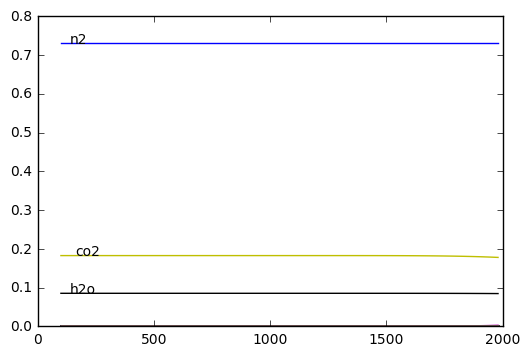

In [20]:
temperatures = np.arange(100,2000,20)
# make a big array to store the results in
equilibrium_mass_fractions = np.zeros((len(temperatures), gas.n_species))
for i, T in enumerate(temperatures):
    gas.TP = T, 1e5
    gas.equilibrate('TP')
    print(T, end=" ")
    equilibrium_mass_fractions[i,:] = gas.Y
plt.plot(temperatures,equilibrium_mass_fractions)
for i, name in enumerate(gas.species_names):
    Y = equilibrium_mass_fractions[:,i]
    if max(Y)> 0.08:
        peakT = temperatures[Y.argmax()]
        peakY = max(Y)
        plt.text(peakT,peakY, name)
plt.show()


## Kinetics
Now we are done with equilbria, let's calculate some kinetics!

Cantera can do complex networks of reactors with valves, flow controllers, etc.
but we will make a simple "reactor network" with just one constant volume ideal gas batch reactor.

In [21]:
gas.TPX = 800, 10e5, X_string

reactor = ct.IdealGasReactor(gas)
reactor_network = ct.ReactorNet([reactor])

start_time = 0.0  #starting time
end_time = 4e-3 # seconds
n_steps = 251
times = np.linspace(start_time, end_time, n_steps)
concentrations = np.zeros((n_steps, gas.n_species))
pressures = np.zeros(n_steps)
temperatures = np.zeros(n_steps)

print_data = True
if print_data:
    #this just gives headings
    print('{0:>10s} {1:>10s} {2:>10s} {3:>14s}'.format(
            't [s]','T [K]','P [Pa]','u [J/kg]')) 

for n, time in enumerate(times):
    if time > 0:
        reactor_network.advance(time)
    temperatures[n] = reactor.T
    pressures[n] = reactor.thermo.P
    concentrations[n,:] = reactor.thermo.concentrations
    if print_data:
        print('{0:10.3e} {1:10.3f} {2:10.3f} {3:14.6e}'.format(
                 reactor_network.time, reactor.T, reactor.thermo.P, reactor.thermo.u))


     t [s]      T [K]     P [Pa]       u [J/kg]
 0.000e+00    800.000 1000000.000   2.419017e+05
 1.600e-05    800.000 1000000.000   2.419017e+05
 3.200e-05    800.000 1000000.000   2.419017e+05
 4.800e-05    800.000 1000000.001   2.419017e+05
 6.400e-05    800.000 1000000.002   2.419017e+05
 8.000e-05    800.000 1000000.003   2.419017e+05
 9.600e-05    800.000 1000000.006   2.419017e+05
 1.120e-04    800.000 1000000.009   2.419017e+05
 1.280e-04    800.000 1000000.013   2.419017e+05
 1.440e-04    800.000 1000000.019   2.419017e+05
 1.600e-04    800.000 1000000.026   2.419017e+05
 1.760e-04    800.000 1000000.037   2.419017e+05
 1.920e-04    800.000 1000000.051   2.419017e+05
 2.080e-04    800.000 1000000.069   2.419017e+05
 2.240e-04    800.000 1000000.093   2.419017e+05
 2.400e-04    800.000 1000000.125   2.419017e+05
 2.560e-04    800.000 1000000.167   2.419017e+05
 2.720e-04    800.000 1000000.222   2.419017e+05
 2.880e-04    800.000 1000000.294   2.419017e+05
 3.040e-04    800.000

Now let's plot some graphs to see how things look

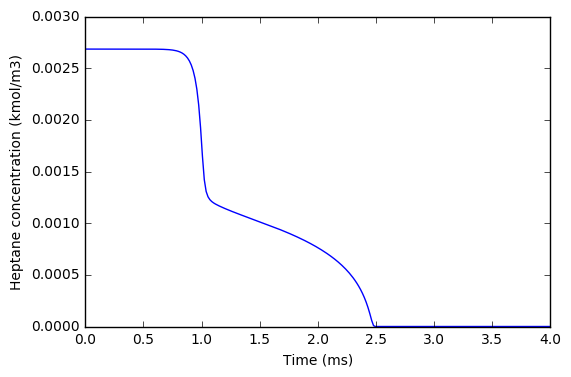

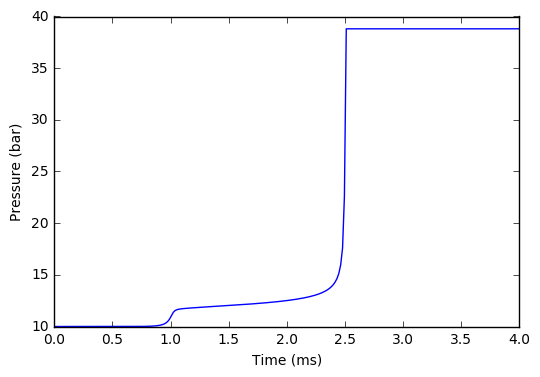

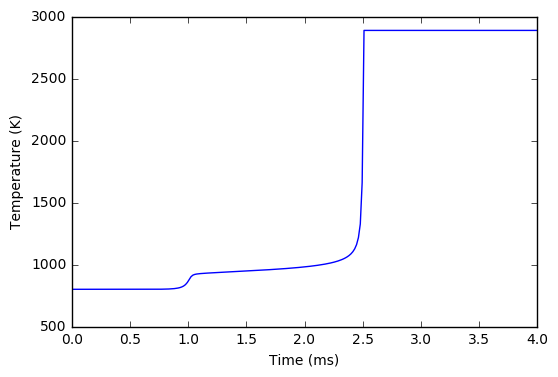

In [22]:
plt.plot(times*1e3, concentrations[:,i_heptane])
plt.ylabel("Heptane concentration (kmol/m3)")
plt.xlabel("Time (ms)")
plt.ylim(0,)
plt.show()
plt.plot(times*1e3, pressures/1e5)
plt.xlabel("Time (ms)")
plt.ylabel("Pressure (bar)")
plt.show()
plt.plot(times*1e3, temperatures)
plt.xlabel("Time (ms)")
plt.ylabel("Temperature (K)")
plt.show()

Although the timescale is milliseconds instead of hours, that looks remarkably like the thermal runaway reaction that caused the T2 laboratory explosion that we studied last lecture. This time, however, it's not just a thermal runaway but a chemical runaway - it's the gradual accumulation of reactive radical species like `OH` that is auto-catalytic.

Let's look at some of the other species:

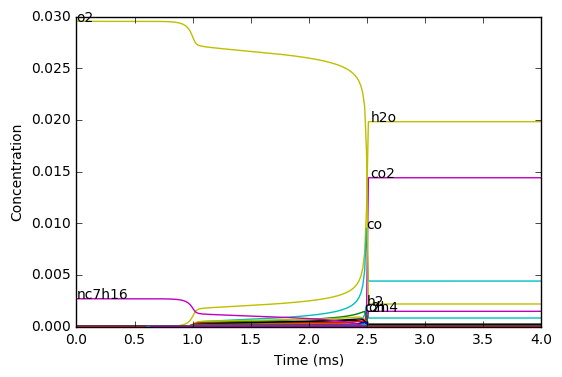

In [23]:
# skip the zeroth species which is nitrogen
plt.plot(times*1e3, concentrations[:,1:])
plt.ylim(0,)
plt.ylabel("Concentration")
plt.xlabel("Time (ms)")
for i, name in enumerate(gas.species_names):
    if i==0: continue
    concentration = concentrations[:,i]
    peak_concentration = max(concentration)
    if peak_concentration > 0.001:
        peak_time = times[concentration.argmax()]
        plt.text(peak_time*1e3, peak_concentration, name)
plt.show()


Let's zoom in on the y axis by making it logarithmic:

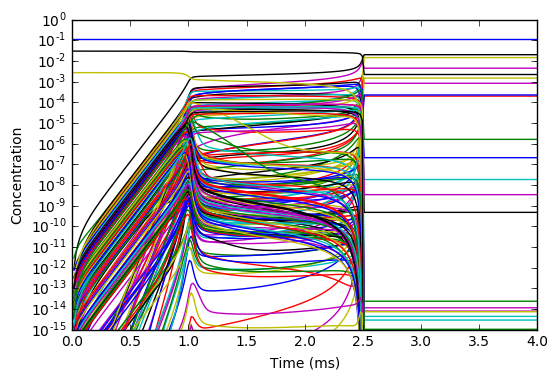

In [24]:
plt.semilogy(times*1e3, concentrations)
plt.ylim(1e-15,1)
plt.ylabel("Concentration")
plt.xlabel("Time (ms)")
plt.show()

What a mess! Let's zoom in a little and see if we can pick out any significant intermediates

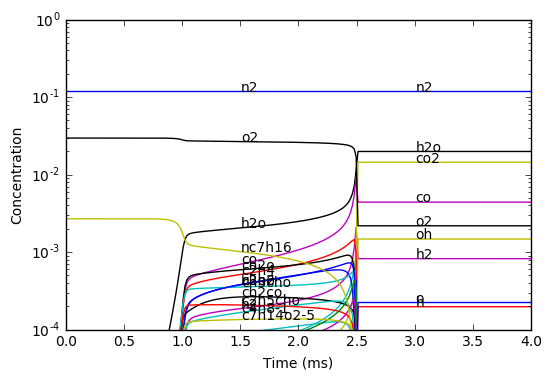

In [25]:
plt.semilogy(times*1e3, concentrations)
plt.ylim(1e-4,1)

# Add some labels
for t in [1.5, 3]:
    i = (times*1e3>t).nonzero()[0][0]
    time = times[i]*1e3
    for j, name in enumerate(gas.species_names):
        concentration = concentrations[i,j]
        if concentration > 1e-4:
            plt.text(time, concentration, name)
plt.ylabel("Concentration")
plt.xlabel("Time (ms)")
plt.show()

Not really!  We would have to do a flux analysis and [reaction path diagram](http://www.cantera.org/docs/sphinx/html/cython/examples/kinetics_reaction_path.html) to see what is going on. 

## Defining ignition delay time.
We want to identify when the ignition occurs, so that we could compare our simulation with an experiment.
Some experiments measure pressure rise; some monitor the concentration of an intermediate like `OH` via laser absorption; but other studies monitor the luminescence of excited `OH*` decaying to ground state `OH` (which it does by emitting a photon). This process is proportional to the rate of formation (not concentration) of `OH*`, which is predominantly made by reaction of `CH` with `O2`, so it is pretty closely proportional to the product `[CH][O2]`, i.e. "brightest flash of light" is propontional to “peak `OH*` emission” which can be modeled as “peak in the product of `[CH]` and `[O2]`”.  Likewise photoemission from creation of excited `CH*` can be modeled reasonably as the product `[C2H][O]`. When modeling an experiment it's important to know precisely what the experimenter measurend and how they defined their derived parameters. For now we'll look for the peak in `OH*` emission:

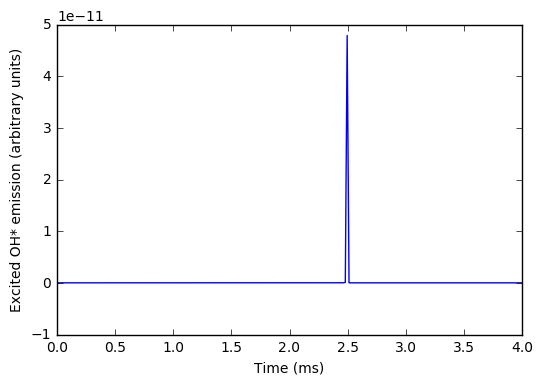

Ignition delay time is 2.496 ms


In [27]:
i_ch = gas.species_index('ch')
i_o2 = gas.species_index('o2')
excited_oh_generation = concentrations[:,i_ch] * concentrations[:,i_o2]
plt.plot(times*1e3, excited_oh_generation)
plt.xlabel("Time (ms)")
plt.ylabel("Excited OH* emission (arbitrary units)")
plt.show()
ignition_time = times[excited_oh_generation.argmax()]
print("Ignition delay time is {0} ms".format(ignition_time * 1e3))

Now let's put it all together, into a function that takes temperature, pressure, and stoichiometry, and predicts ignition delay time for n-heptane. It's a bit different from before - now we let the ODE solver choose the array of times, which means we don't know how long it will be when we begin, so we have to use lists (which can grow as we add to them) and convert to arrays when we've finished. 

In [30]:
def get_ignition_delay(temperature, pressure = 10.,
                       stoichiometry = 1.0, plot = False):
    """
    Get the ignition delay time in miliseconds, at the specified
    temperature (K), pressure (bar), and stoichiometry 
    (stoichiometric = 1.0, fuel-rich > 1.0, oxygen-rich < 1.0).
    Default pressure is 10.0 bar, default stoichoimetry is 1.0.
    If plot=True then it draws a plot (default is False).
    """
    oxygen_mole = 1. 
    nitrogen_mole = 4*oxygen_mole
    heptane_mole = stoichiometry/11
    X_string = 'nc7h16:{0},o2:{1},n2:{2}'.format(heptane_mole, oxygen_mole, nitrogen_mole)

    gas.TPX = temperature, pressure*1e5, X_string
    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])

    time = 0.0
    end_time = 10e-3 
    
    # Use lists instead of arrays, so they can be any length
    times = []
    concentrations = []
    pressures = []
    temperatures = []
    
    print_data = True
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        # take a timestep towards the end_time.
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step(end_time)
    
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    i_ch = gas.species_index('ch')
    i_o2 = gas.species_index('o2')
    excited_oh_generation = concentrations[:,i_o2] * concentrations[:,i_ch]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_oh_generation, 'g')
        plt.ylabel("OH* emission")
        plt.ylim(0,max(1e-8,1.1*max(excited_oh_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_oh_gen = excited_oh_generation.argmax()
    if step_with_highest_oh_gen > 1 and excited_oh_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_oh_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure, ignition_time_ms))
        return ignition_time_ms
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure))
        return np.infty


Let's test it at 1000 K, 10 bar.

Reached end time 16.46 ms in 3844 steps


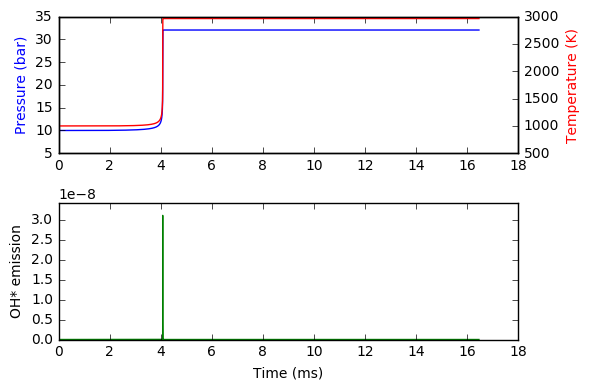

At 1000 K 10 bar, ignition delay time is 4.076377939233235 ms


4.0763779392332351

In [31]:
get_ignition_delay(1000, 10, plot=True)

Now let's repeat it at a range of temperatures and pressures, and plot all the delay times on one graph

Reached end time 16.46 ms in 3844 steps
At 1000.0 K 10 bar, ignition delay time is 4.076377939233235 ms
Reached end time 12.30 ms in 3749 steps
At 1020.8333333333334 K 10 bar, ignition delay time is 3.031301714993015 ms
Reached end time 16.25 ms in 3570 steps
At 1041.6666666666667 K 10 bar, ignition delay time is 2.2619690437251014 ms
Reached end time 15.01 ms in 3711 steps
At 1062.5 K 10 bar, ignition delay time is 1.7024844250438584 ms
Reached end time 18.54 ms in 3752 steps
At 1083.3333333333333 K 10 bar, ignition delay time is 1.293966504435399 ms
Reached end time 18.38 ms in 3699 steps
At 1104.1666666666667 K 10 bar, ignition delay time is 0.9922337993995051 ms
Reached end time 19.20 ms in 3460 steps
At 1125.0 K 10 bar, ignition delay time is 0.7663617661996656 ms
Reached end time 13.64 ms in 3823 steps
At 1145.8333333333333 K 10 bar, ignition delay time is 0.5952239664936644 ms
Reached end time 13.20 ms in 3510 steps
At 1166.6666666666667 K 10 bar, ignition delay time is 0.464331

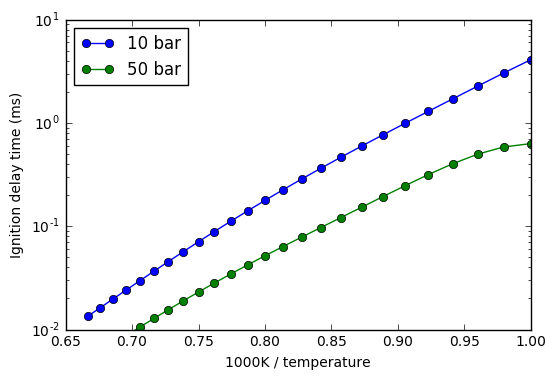

In [32]:
temperatures = np.linspace(1000,1500.,25)
ignition_delay_times = np.zeros_like(temperatures)
for P in [10,50]:
    for i,T in enumerate(temperatures):
        ignition_delay_times[i] = get_ignition_delay(T, P)
    plt.semilogy(1000./temperatures, ignition_delay_times, 'o-', label='{0} bar'.format(P))

plt.legend(loc='best')
plt.xlabel("1000K / temperature")
plt.ylabel("Ignition delay time (ms)")
plt.ylim(1e-2,)
plt.show()

## Question (d)
Explain why this look as you would expect from Arrhenius behaviour.

## Question (e)
Repeat the analysis but going down to 650K (i.e. cover the range 650-1500K).
Describe and try to explain what you find.

Reached end time 10.14 ms in 41 steps
At 650.0 K 10 bar, no ignition detected
Reached end time 10.02 ms in 171 steps
At 685.4166666666666 K 10 bar, no ignition detected
Reached end time 18.55 ms in 5360 steps
At 720.8333333333334 K 10 bar, ignition delay time is 5.600085215879025 ms
Reached end time 10.46 ms in 5212 steps
At 756.25 K 10 bar, ignition delay time is 3.046857331779307 ms
Reached end time 15.07 ms in 4993 steps
At 791.6666666666666 K 10 bar, ignition delay time is 2.4699814213865374 ms
Reached end time 13.71 ms in 4891 steps
At 827.0833333333333 K 10 bar, ignition delay time is 2.9739623772888204 ms
Reached end time 11.10 ms in 4595 steps
At 862.5 K 10 bar, ignition delay time is 4.751325560071203 ms
Reached end time 17.29 ms in 4117 steps
At 897.9166666666666 K 10 bar, ignition delay time is 7.7486164086108715 ms
Reached end time 15.01 ms in 3923 steps
At 933.3333333333333 K 10 bar, ignition delay time is 8.539998761866903 ms
Reached end time 13.57 ms in 3839 steps
At 968

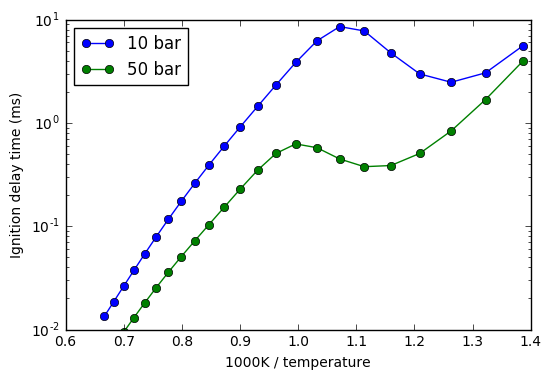

In [33]:
temperatures = np.linspace(650,1500.,25)
ignition_delay_times = np.zeros_like(temperatures)
for P in [10,50]:
    for i,T in enumerate(temperatures):
        ignition_delay_times[i] = get_ignition_delay(T, P)
    plt.semilogy(1000./temperatures, ignition_delay_times, 'o-', label='{0} bar'.format(P))

plt.legend(loc='best')
plt.xlabel("1000K / temperature")
plt.ylabel("Ignition delay time (ms)")
plt.ylim(1e-2,)
plt.show()